In [2]:
import pandas as pd

# Load your dataset
data = pd.read_csv('new_m_dataset32.csv')  




In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import numpy as np

# Load your dataset (e.g., "new_m_dataset25.csv")
df = pd.read_csv("new_m_dataset25.csv")

# Extract the features and target
features = data[['t_mean_Value', 'L_Value', 'E_Value','e_m']].values
target = data['P_Value'].values

# Normalize the features and target
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

features = scaler_features.fit_transform(features)
target = scaler_target.fit_transform(target.reshape(-1, 1))

# Create sequences and labels
sequence_length = 10
X, y = [], []

for i in range(len(features) - sequence_length):
    X.append(features[i: i + sequence_length])
    y.append(target[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Shuffle the data
permutation = np.random.permutation(len(X))
X = X[permutation]
y = y[permutation]
# Print the shapes of y_true and y_pred
# print("Shape of y_true:", y_test.shape)
# print("Shape of y_pred:", y_pred.shape)


# Split the shuffled data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(8))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform to get the original scale
y_pred = scaler_target.inverse_transform(y_pred)
y_test = scaler_target.inverse_transform(y_test)

# Evaluate the model (you can use various metrics)
from sklearn.metrics import mean_squared_error

# Calculate the R-squared (R^2) score
r_squared = r2_score(y_test.ravel(), y_pred.ravel())
print(f"R-squared (R^2) Score: {r_squared:.2f}")


# # Print the forecasted values
# print("Forecasted Values:")
# for i in range(len(y_pred)):
#     print(f"Actual: {y_test[i][0]:.2f}, Predicted: {y_pred[i][0]:.2f}")

# Make predictions for the next 5 years
num_years_to_forecast = 5
forecasted_values = []

# Use the last available data as the initial input for forecasting
input_data = X_test[-1]

for _ in range(num_years_to_forecast):
    # Predict the next value
    next_value = model.predict(input_data.reshape(1, sequence_length, X_test.shape[2]))

    # Inverse transform to get the original scale
    next_value = scaler_target.inverse_transform(next_value)

    # Append the predicted value to the forecasted_values list
    forecasted_values.append(next_value[0, 0])

    # Update the input_data for the next iteration
    input_data = np.roll(input_data, shift=-1, axis=0)  # Shift data to the left
    input_data[-1] = next_value  # Add the new prediction at the end

# Print the forecasted values for the next 5 years
print("Forecasted Values for the Next 5 Years:")
for i, value in enumerate(forecasted_values, start=1):
    print(f"Year {i}: {value:.2f}")


Epoch 1/400
338/338 [==============================] - 7s 10ms/step - loss: 0.0408 - val_loss: 0.0387
Epoch 2/400
338/338 [==============================] - 2s 7ms/step - loss: 0.0363 - val_loss: 0.0333
Epoch 3/400
338/338 [==============================] - 2s 7ms/step - loss: 0.0246 - val_loss: 0.0200
Epoch 4/400
338/338 [==============================] - 2s 7ms/step - loss: 0.0192 - val_loss: 0.0191
Epoch 5/400
338/338 [==============================] - 2s 7ms/step - loss: 0.0176 - val_loss: 0.0178
Epoch 6/400
338/338 [==============================] - 2s 7ms/step - loss: 0.0167 - val_loss: 0.0166
Epoch 7/400
338/338 [==============================] - 2s 7ms/step - loss: 0.0156 - val_loss: 0.0166
Epoch 8/400
338/338 [==============================] - 3s 8ms/step - loss: 0.0143 - val_loss: 0.0141
Epoch 9/400
338/338 [==============================] - 2s 7ms/step - loss: 0.0127 - val_loss: 0.0131
Epoch 10/400
338/338 [==============================] - 2s 7ms/step - loss: 0.0116 - val_l

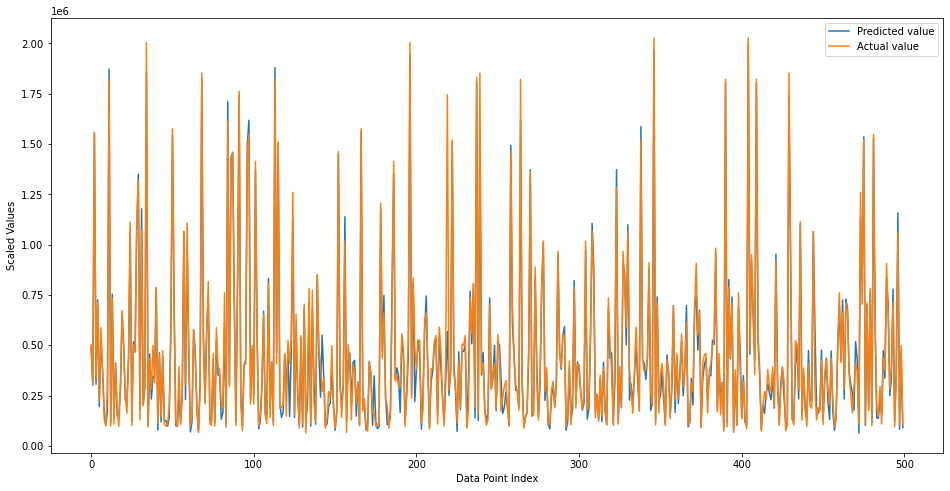

In [7]:
import matplotlib.pyplot as plt

test = pd.DataFrame({'Predicted value': y_pred.ravel(), 'Actual value': y_test.ravel()})

fig = plt.figure(figsize=(16, 8))
test = test.reset_index()
test = test.drop(['index'], axis=1)

# Plot the first 500 data points (you can adjust the range as needed)
plt.plot(test[:500])

plt.legend(['Predicted value', 'Actual value'])
plt.xlabel('Data Point Index')
plt.ylabel('Scaled Values')  # You may want to customize the label based on your data scaling

# Optionally, save the plot to a file
# plt.savefig('D:\\nile\\Final project\\pic\\evalution\\validation.png', dpi=300)

plt.show()
